## Table of Contents
* [1. Introduction](#chapter1)
    * [1.1 Description](#section1_1)
    * [1.2 Main aims](#section1_2)
    * [1.3 Data description](#section1_3)
* [2. Preparation](#chapter2)
    * [2.1 Importing libs](#section2_1)
    * [2.2 Data import, research and preparation](#section2_2) 
* [3. Exploratory data analysis](#chapter3)
    * [3.1 Observation of profiles, countries, devices and channels](#section3_1)
    * [3.2 Marketing costs analysis](#section3_2)
* [4. Marketing profitability](#chapter4)
    * [4.1 Data preparation](#section4_1)
    * [4.2 LTV, ROI and CAC analysis](#section4_2)
    * [4.3 Conversion and Retention analysis](#section4_3)
    * [4.4 Marketing profitability by devices](#section4_4)
    * [4.5 Marketing profitability by countries](#section4_5)
    * [4.6 Marketing profitability by channels](#section4_6)
* [5. Results](#chapter5)    

# 1. Introduction <a class="anchor" id="chapter1"></a>

### 1.1 Description <a class="anchor" id="section1_1"></a>

Based on the data provided by the Procrastinate Pro+ application, an analysis of marketing expenses is conducted by user acquisition channels, their regions, and devices.

Among the analyzed indicators:

- Conversion and retention as indicators of the effectiveness of using channels for acquisition.
- LTV, CAC, and ROI as indicators of profitability.

Setting today's date as **November 1, 2019** and expected profitability of users as **14 days**.

### 1.2 Main aims: <a class="anchor" id="section1_2"></a>

1. Determination of unprofitable marketing channels. 
2. Formulation of recommendations to improve the company's economy based on the analysis of advertising expenses.

### 1.3 Data description <a class="anchor" id="section1_3"></a>

Three datasets at our disposal. 
The file **visits_info_short.csv** contains server logs with information about website visits, **orders_info_short.csv** contains information about orders, and **costs_info_short.csv** contains information about advertising expenses.

The structure of **visits_info_short.csv** is as follows:
- `User Id` - unique user identifier,
- `Region` - user country,
- `Device` - user device type,
- `Channel` - source identifier,
- `Session Start` - session start date and time,
- `Session End` - session end date and time.

The structure of **orders_info_short.csv** is as follows:
- `User Id` - unique user identifier,
- `Event Dt` - purchase date and time,
- `Revenue` - order amount.

The structure of **costs_info_short.csv** is as follows:
- `dt` - date of the advertising campaign,
- `Channel` - advertising source identifier,
- `costs` - expenses for this campaign.

# 2. Preparation <a class="anchor" id="chapter2"></a>

### 2.1 Importing libs <a class="anchor" id="section2_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### 2.2 Data import, research and preparation <a class="anchor" id="section2_2"></a>

In [2]:
visits, orders, costs = (pd.read_csv('https://raw.githubusercontent.com/AntonMiniazev/YaP_projects/main/3.%20Marketing_analysis/datasets/visits_info_short.csv'),
          pd.read_csv('https://raw.githubusercontent.com/AntonMiniazev/YaP_projects/main/3.%20Marketing_analysis/datasets/orders_info_short.csv'),
          pd.read_csv('https://raw.githubusercontent.com/AntonMiniazev/YaP_projects/main/3.%20Marketing_analysis/datasets/costs_info_short.csv'))

In [3]:
# Checking visits table
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# Adapting column names
visits.columns = ['user_id','region','device','channel','session_start','session_end']

In [5]:
# Checking orders table
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
# Adapting column names
orders.columns = ['user_id','event_dt','revenue']

In [7]:
# Checking costs table
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
# Adapting column names
costs.columns = ['dt','channel','costs']

In [9]:
# Checking types and duplicates in visits table
print(visits.info(),'\nDuplicated:' + str(visits.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None 
Duplicated:0


In [10]:
# Sessions have incorrect type object, changing to datetime

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# Creating a new column with session duration
visits['session_duration'] = visits['session_end'] - visits['session_start']

In [11]:
# Checking types and duplicates in orders table
print(orders.info(),'\nDuplicated:' + str(orders.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None 
Duplicated:0


In [12]:
# Date of purchase has incorrect type object, changing to datetime

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
# Checking types and duplicates in costs table
print(costs.info(),'\nDuplicated:' + str(costs.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None 
Duplicated:0


In [14]:
# Date of marketing campaign has incorrect type object, changing to date

costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

# 3. Exploratory data analysis <a class="anchor" id="chapter3"></a>

For further analysis let's prepare functions.
Functions for metrics calculation:

- `get_profiles()` — creates user profiles,
- `get_retention()` — calculates Retention Rate,
- `get_conversion()` — calculates Conversion,
- `get_ltv()` — calculates LTV.

Functions for graph preparation:

- `filter_data()` — calculates rolling average,
- `plot_retention()` — creates graph with Retention Rate,
- `plot_conversion()` — creates graph with Conversion,
- `plot_ltv_roi` — visualizes LTV and ROI.

In [15]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):    

    # Finding parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # For cohort analysis, determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # Adding a feature for paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Adding flags for all events from event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # Counting the number of unique users with the same source and acquisition date
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Merging ad costs and the number of acquired users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # Dividing ad costs by the number of acquired users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # Adding the cost of acquisition to the profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # The cost of acquisition for organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Adding the 'payer' column to the list of dimensions passed in
    dimensions = ['payer'] + dimensions

    # Excluding users who didn't "survive" until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Collecting "raw" data for retention calculation
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # Function for grouping the table by desired characteristics
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Getting the retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Getting the retention dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Returning both tables and the raw data
    return result_raw, result_grouped, result_in_time

In [17]:
def get_conversion(
profiles,
purchases,
observation_date,
horizon_days,
dimensions=[],
ignore_horizon=False,
):
    
    # Excluding users who did not survive until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Determining the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # Adding purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # Calculating lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # Grouping by cohort if dimensions is empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Function to group the table by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Divide each cell in a row by the cohort size to obtain the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # Getting the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # Removing 'cohort' from dimensions for the conversion dynamics table
    if 'cohort' in dimensions: 
        dimensions = []

    # Getting the conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # Returning both tables and raw data
    return result_raw, result_grouped, result_in_time


In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # Excluding users who did not survive until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # Adding purchase data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # Calculating user lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # Grouping by cohort if dimensions is empty
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # Function for grouping by desired parameters
    def group_by_dimensions(df, dims, horizon_days):
        # Building a triangular revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # Calculating cumulative revenue
        result = result.fillna(0).cumsum(axis=1)
        # Calculating cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # Combining cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # Calculating LTV: divide each cell in a row by cohort size
        result = result.div(result['cohort_size'], axis=0)
        # Excluding all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # Restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # Collecting a dataframe with user data and CAC values, 
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # Calculating average CAC by dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # Calculating ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # Removing rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # Restoring cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # Adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # Keeping cohort sizes, CAC, and ROI in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # Returning LTV and ROI tables
        return result, roi

    # Getting LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # Removing 'cohort' from dimensions for LTV and ROI tables in time
    if 'cohort' in dimensions:
        dimensions = []

    # Getting LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table 
        result_in_time,  # LTV dynamica table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )     

In [19]:
def filter_data(df, window):
    # For each column applying rolling average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):
    plt.figure(figsize=(15, 10))

    # Dropping cohort size and retention of the first day
    retention = retention.drop(columns=['cohort_size', 0])

    # Keeping only the necessary lifetime in the retention history table
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # Adding the second feature 'cohort' if only payer is present in the index of the retention table
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # Creating a 2x2 plot with four cells
    # The first cell contains the retention curves of paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # The second cell contains the retention curves of non-paying users
    # The vertical axis is shared with the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # The third cell contains the retention dynamics of paying users
    ax3 = plt.subplot(2, 2, 3)
    # Getting the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # Filtering the data and plotting the graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title(
        'Retention dynamics of paying users on the {}-th day'.format(
            horizon
        )
    )

    # The fourth cell contains the retention dynamics of non-paying users
    # The vertical axis is shared with the third cell
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # Filtering the data and plotting the graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition date')
    plt.title(
        'Retention dynamics of non-paying users on the {}-th day'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()


In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    # Setting the size of the plot
    plt.figure(figsize=(15, 5))

    # Excluding cohort sizes from the conversion table
    conversion = conversion.drop(columns=['cohort_size'])

    # Keeping only the necessary lifetime in the conversion history table
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # First plot - conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # Second plot - conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # The columns of the pivot table will be all the index columns, except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('User conversion dynamics on day {}.'.format(horizon))

    # Adjusting subplot layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    # Setting plot size
    plt.figure(figsize=(20, 10))

    # Removing cohort sizes from ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # Filter ltv_history table to only show the desired lifetime
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # Separating out the customer acquisition cost data
    cac_history = roi_history[['cac']]

    # Removing cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # Filtering roi_history table to only show the desired lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]

    # Plotting LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # Plotting LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # Creating a pivot table with all columns in the index except the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition Date')
    plt.title('LTV Dynamics for Users on {}th Day'.format(horizon))

    # Plotting CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # Creating a pivot table with all columns in the index except the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition Date')
    plt.title('User Acquisition Cost Dynamics')

    # Plotting ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-Even Point')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # Plotting ROI dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # Creating a pivot table with all columns in the index except the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Break-Even Point')
    plt.xlabel('Acquisition Date')
    plt.title('ROI Dynamics for Users on {}th Day'.format(horizon))

    # Showing plot
    plt.tight_layout()
    plt.show()

### 3.1 Observation of profiles, countries, devices and channels <a class="anchor" id="section3_1"></a>

To achieve understanding of user specifics let's set the plan of analysis:
* Creation of user profiles. Determination of the minimum and maximum user acquisition dates.
* Definition of the users country origins in the application and which country has the highest number of paying users.
* Exploration of the devices used by customers and which devices paying users prefer.
* Identification of the channels from which the most paying users came.

#### Creating profiles

In [23]:
profiles = get_profiles(sessions = visits, orders = orders, events = [], ad_costs = costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [24]:
print('Minimum acquisition date:',min(profiles['first_ts']))
print('Maximum acquisition date:',max(profiles['first_ts']))

Minimum acquisition date: 2019-05-01 00:00:41
Maximum acquisition date: 2019-10-27 23:59:04


**Brief conclusion:** According to the taks, it is necessary to analyze the profitability for a period of 14 days, and the moment of analysis is November 1, 2019. There is enough data for profitability analysis over a 2-week period, but there is no data available for the period from October 27 to November 1, 2019 for a complete analysis up to the current moment.

#### Exploring countries

In [25]:
# Checking user by countries
users_regions = profiles.groupby('region').agg({'user_id': 'nunique'}).reset_index()
users_regions.columns = ['region','num_users']

payers_regions = profiles[profiles['payer'] == True].groupby('region').agg({'user_id': 'nunique'}).reset_index()
payers_regions.columns = ['region','num_payers']

users_regions = users_regions.merge(payers_regions, on = 'region')
users_regions['%_payers'] = 100 * users_regions['num_payers']/users_regions['num_users']
users_regions.sort_values(by='%_payers',ascending=False)

,region,num_users,num_payers,%_payers
3,United States,100002,6902,6.901862
1,Germany,14981,616,4.111875
2,UK,17575,700,3.982930
0,France,17450,663,3.799427


**Brief conclusion:** The largest share of paying users is in the United States and amounts to 6.9%

#### Exploring devices

In [26]:
# Calculating users by their devices
users_devices = profiles.groupby('device').agg({'user_id': 'nunique'}).reset_index()
users_devices.columns = ['device','num_users']

payers_devices = profiles[profiles['payer'] == True].groupby('device').agg({'user_id': 'nunique'}).reset_index()
payers_devices.columns = ['device','num_payers']

users_devices = users_devices.merge(payers_devices, on = 'device')
users_devices['%_payers'] = 100 * users_devices['num_payers']/users_devices['num_users']
users_devices.sort_values(by='%_payers',ascending=False)

,device,num_users,num_payers,%_payers
1,Mac,30042,1912,6.364423
3,iPhone,54479,3382,6.207897
0,Android,35032,2050,5.851793
2,PC,30455,1537,5.046790


**Brief conclusion:** Among the users, the iPhone is the most popular. The highest percentage of paying users is on Mac with 6.36% of paying users.

#### Exploring channels

In [27]:
# Calculating users by channels
users_channels = profiles.groupby('channel').agg({'user_id': 'nunique'}).reset_index()
users_channels.columns = ['channel','num_users']
payers_channels = profiles[profiles['payer'] == True].groupby('channel').agg({'user_id': 'nunique'}).reset_index()
payers_channels.columns = ['channel','num_payers']
users_channels = users_channels.merge(payers_channels, on = 'channel')
users_channels['%_payers'] = 100 * users_channels['num_payers']/users_channels['num_users']
users_channels.sort_values(by='%_payers',ascending=False)

,channel,num_users,num_payers,%_payers
1,FaceBoom,29144,3557,12.204914
0,AdNonSense,3880,440,11.340206
9,lambdaMediaAds,2149,225,10.469986
6,TipTop,19561,1878,9.600736
5,RocketSuperAds,4448,352,7.913669
7,WahooNetBanner,8553,453,5.296387
8,YRabbit,4312,165,3.826531
3,MediaTornado,4364,156,3.574702
2,LeapBob,8553,262,3.063253
4,OppleCreativeMedia,8605,233,2.707728


**Brief conclusion:** More than a third of users came through organic search, however, a smaller share of paying users come through this channel. The highest share of paying users is brought by **FaceBoom** (12.2% of users from this channel) and **AdNonSense** (11.34% of users from this channel).

### 3.2 Marketing costs analysis <a class="anchor" id="section3_2"></a>

To estimate costs let's set the plan of analysis:
* Calculation of the total amount of marketing expenses.
* Finding out how the expenses are distributed among advertising sources, that is, how much money was spent on each source.
* Creation of a visualization showing the dynamics of changes in expenses over time (by weeks and months) for each source.
* Determinition of the average cost of acquiring one user (CAC) from each source. Use user profiles.

#### Total marketing costs

In [28]:
print('Total marketing costs: ',round(profiles['acquisition_cost'].sum(),2))

Total marketing costs:  105497.3


#### Marketing costs by channels

In [29]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost',ascending=False)

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Brief conclusion:** Half of the marketing expenses are accounted for by the **TipTop** channel (55k), and the second largest channel is **FaceBoom** (32.5k). Each of the other channels had expenses of 5k or less.

#### Dynamic of marketing costs

In [30]:
# Pivoting costs for further plotting
report = costs.pivot_table(
    index='dt', columns='channel', values = 'costs', aggfunc='mean')

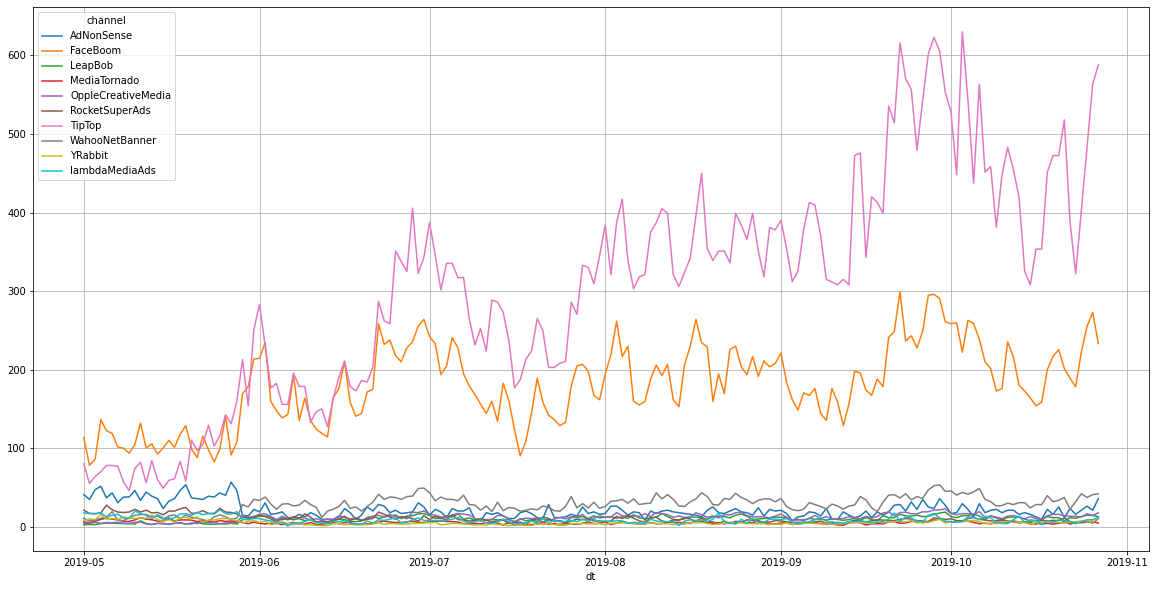

In [31]:
report.plot(figsize=(20, 10), grid=True)
plt.show()

In [32]:
# Adding columns for weekls representation
costs_week = costs
costs_week['week'] = pd.to_datetime(costs_week['dt']).dt.isocalendar().week

# Grouping costs by week and channel
costs_week = costs_week.groupby(['week', 'channel'])['costs'].sum().reset_index()

# Pivoting costs for further plotting
report_week = costs_week.pivot_table(
    index='week', columns='channel', values = 'costs', aggfunc='mean')

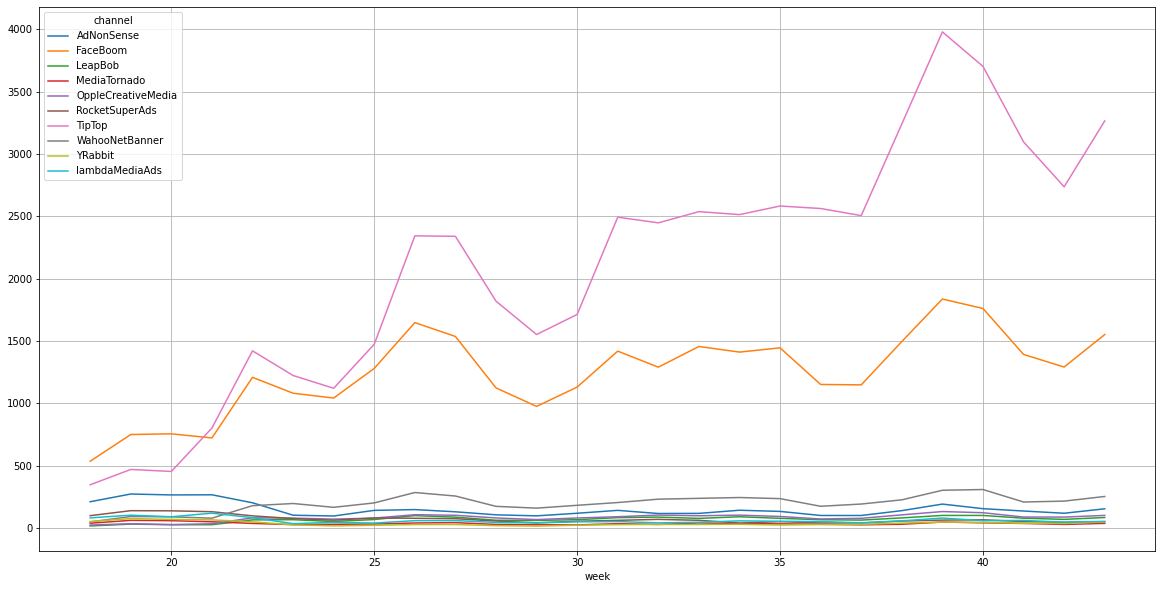

In [33]:
report_week.plot(figsize=(20, 10), grid=True)
plt.show()

**Brief conclusion:** In May, **FaceBoom** was the main channel where money was spent. Then, until mid-June, **FaceBoom** and **TipTop** remained the main channels, and after that, the main expenses were on **TipTop** with a noticeable lead over **FaceBoom**. Among other channels, it is worth noting the dynamics of expenses on **AdNonSense**, which was in the top three popular channels, but from June the expenses decreased to the level of other channels.

# 4. Marketing profitability <a class="anchor" id="chapter4"></a>

### 4.1 Data preparation <a class="anchor" id="section4_1"></a>

Let's sort the organic users because it is necessary to evaluate the profitability of specific sources. The indirect effect of marketing expenses by channels may also be reflected in the dynamics of organics, but for analysis purposes, we will limit ourselves to direct costs, studying only general graphs for all users.

In [34]:
users_to_keep = profiles[profiles['channel'] != 'organic']['user_id']
profiles_channels = profiles[profiles['user_id'].isin(users_to_keep)]
orders_channels = orders[orders['user_id'].isin(users_to_keep)]

In [35]:
observation_date = datetime(2019, 10, 27).date()
horizon_days = 14

### 4.2 LTV, ROI and CAC analysis <a class="anchor" id="section4_2"></a>

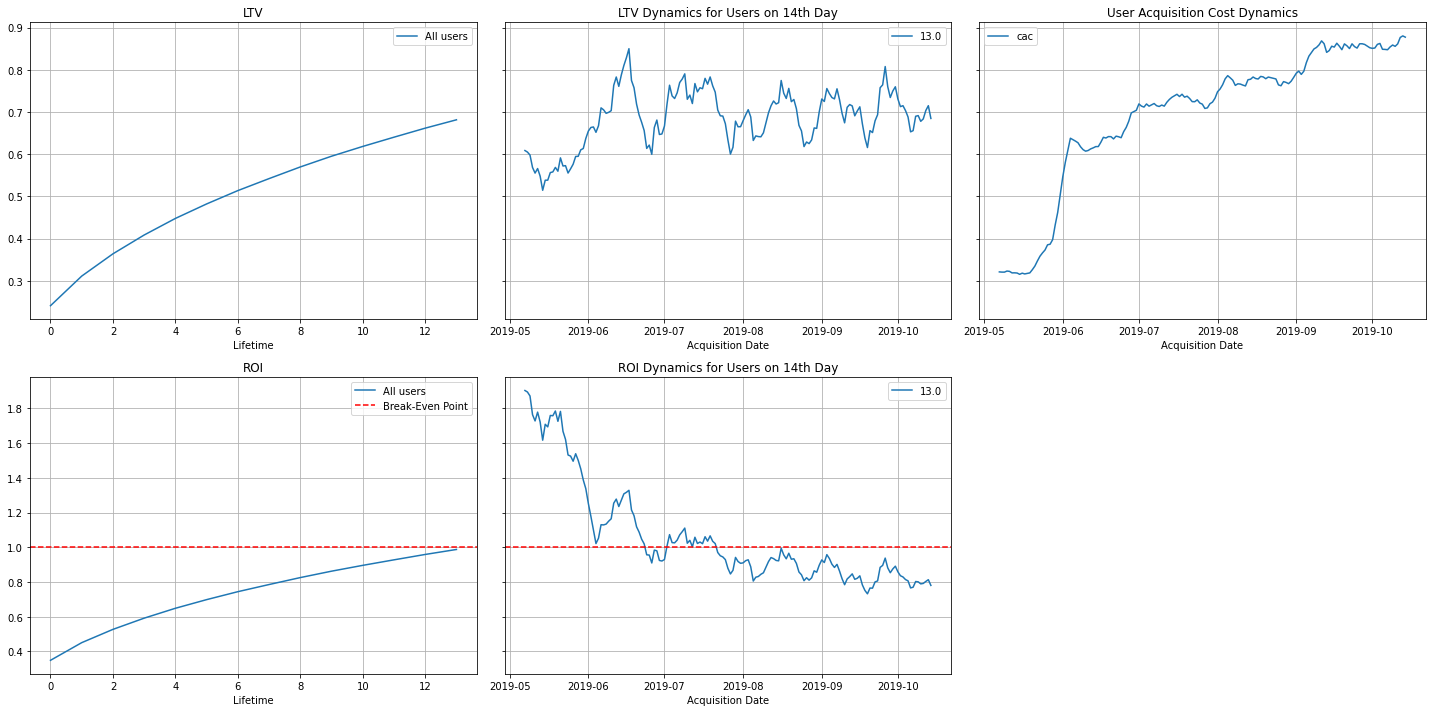

In [36]:
# Calculating LTV and ROI for all users
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

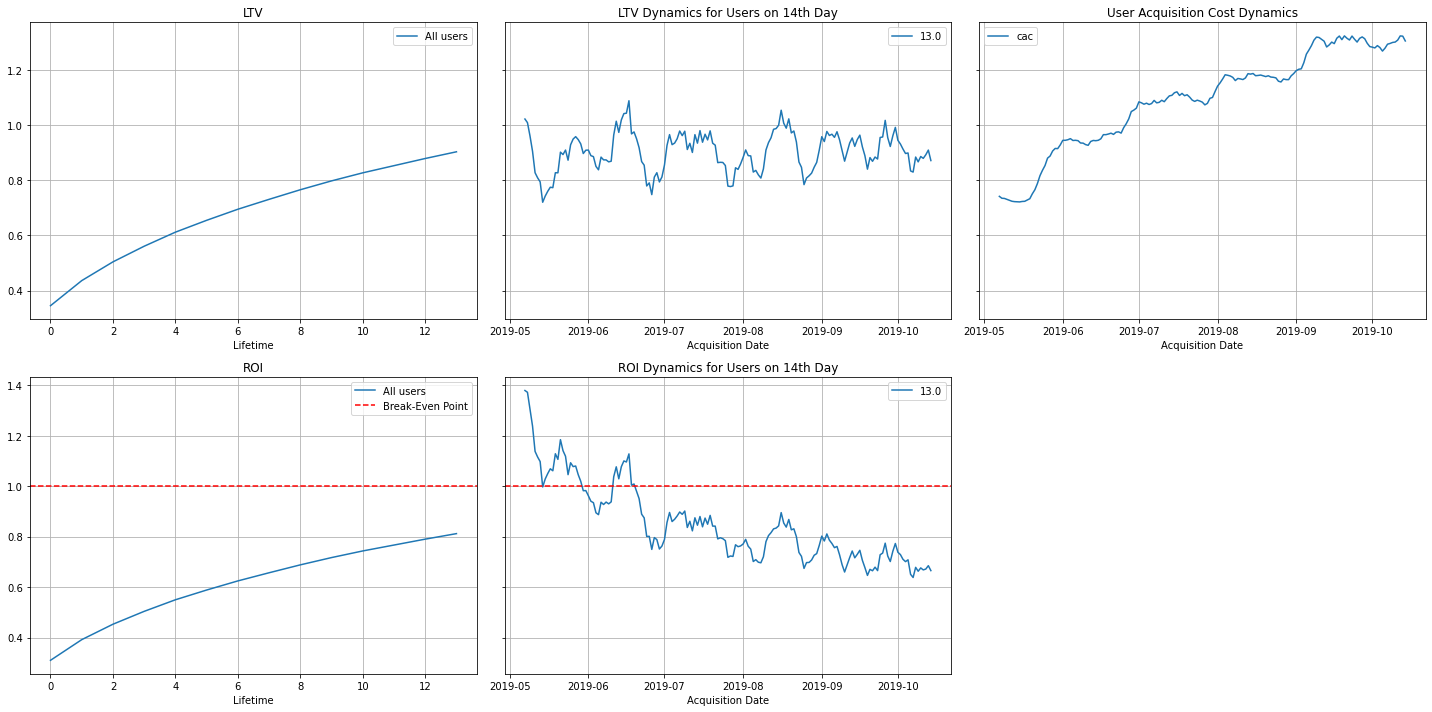

In [37]:
# Calculating LTV and ROI for organic users
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channels, orders_channels, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<b> Conclusions based on LTV and ROI graphs:</b> </br>

- By the 14th day, advertising does not reach profitability (about 80%). Taking into account organic users, ROI approaches 100%, but does not reach it.
- Since June, there has been a sharp increase in acquisition costs, which continues to grow until November 2019.
- As advertising expenses increase, ROI on the 14th day decreases, indicating that the budget is being spent on ineffective sources.
- LTV is generally stable.

### 4.3 Conversion and Retention analysis <a class="anchor" id="section4_3"></a>

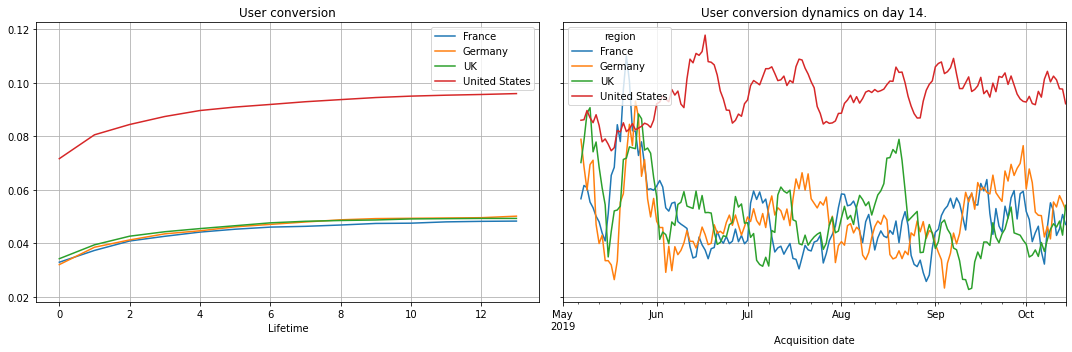

In [38]:
# Preparing conversion by countries
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channels, orders_channels, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

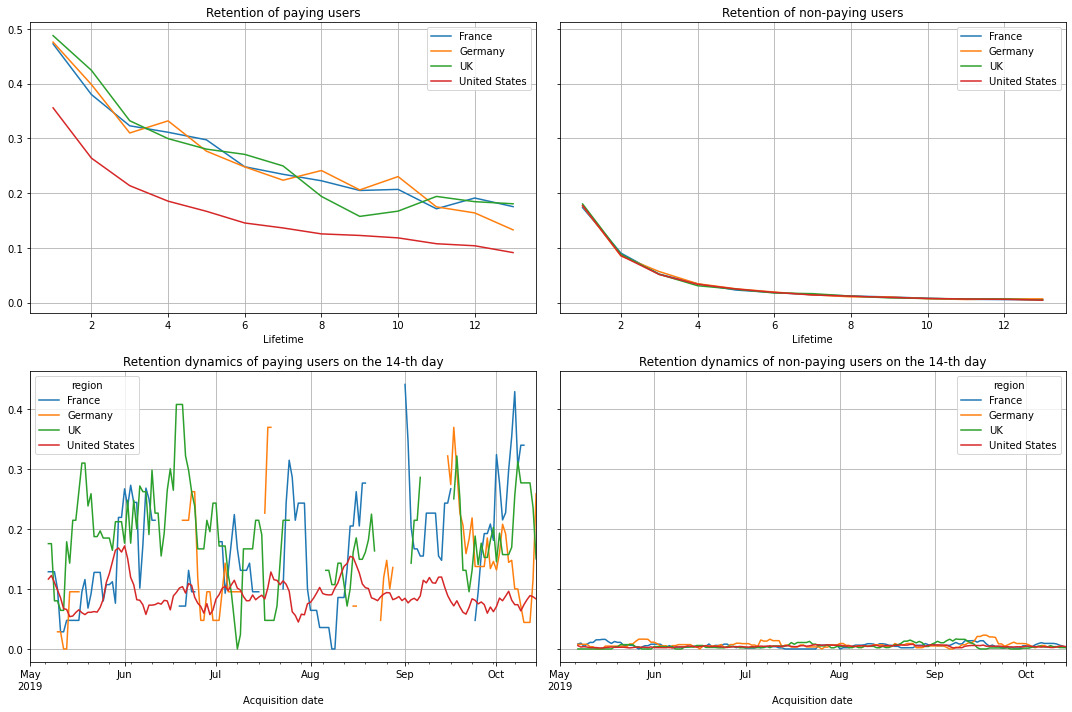

In [39]:
# Preparing retention by countries
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channels, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

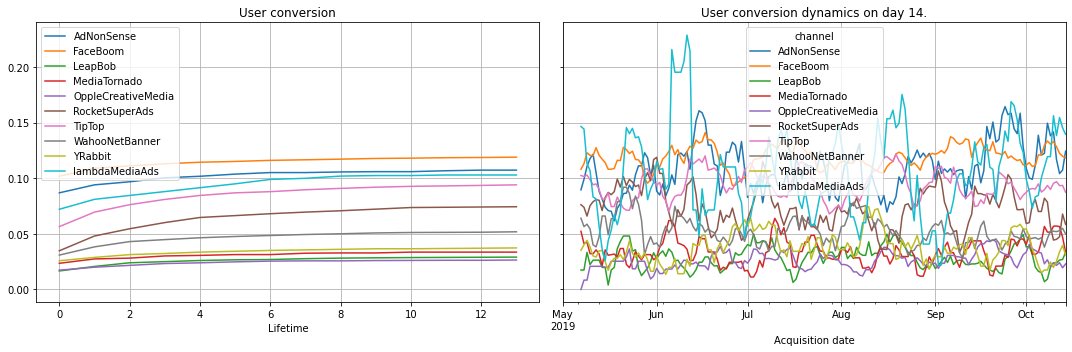

In [40]:
# Preparing conversion by devices
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_channels, orders_channels, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

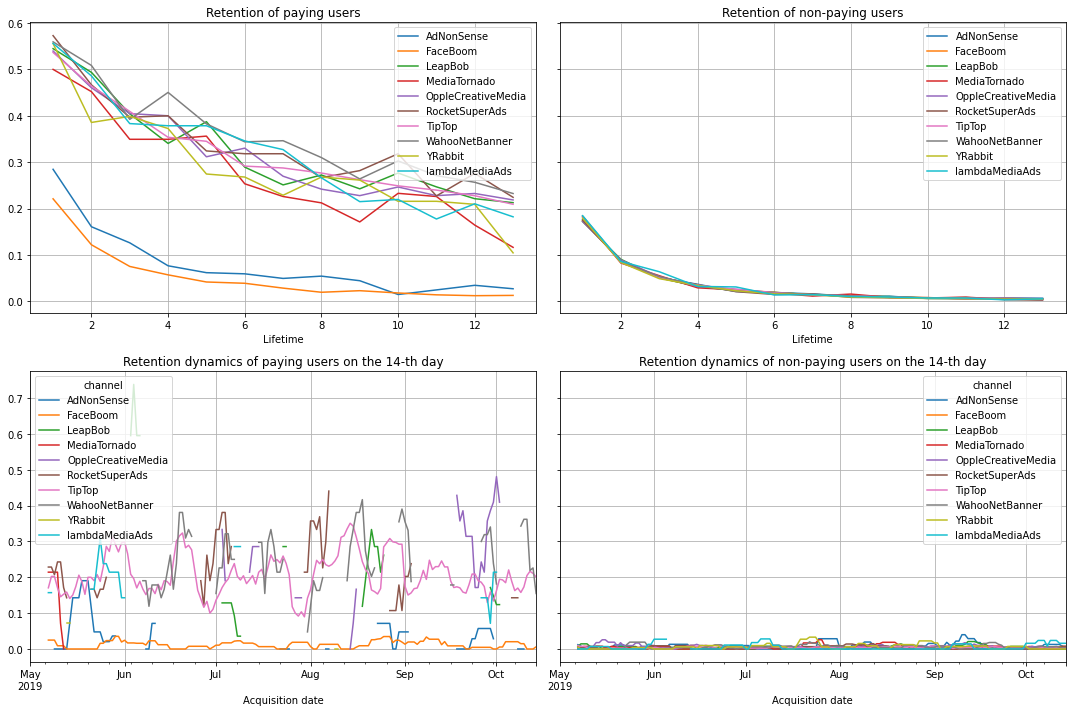

In [41]:
# Preparing retention by devices
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_channels, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<b> Conclusions based on Retention and Conversion graphs:</b> </br>

- Despite the high conversion rate among users from the USA, they have the worst retention.
- The two main channels, AdNonSense and FaceBoom, have slightly higher conversion rates compared to other channels but significantly worse retention.

### 4.4 Marketing profitability by devices <a class="anchor" id="section4_4"></a>

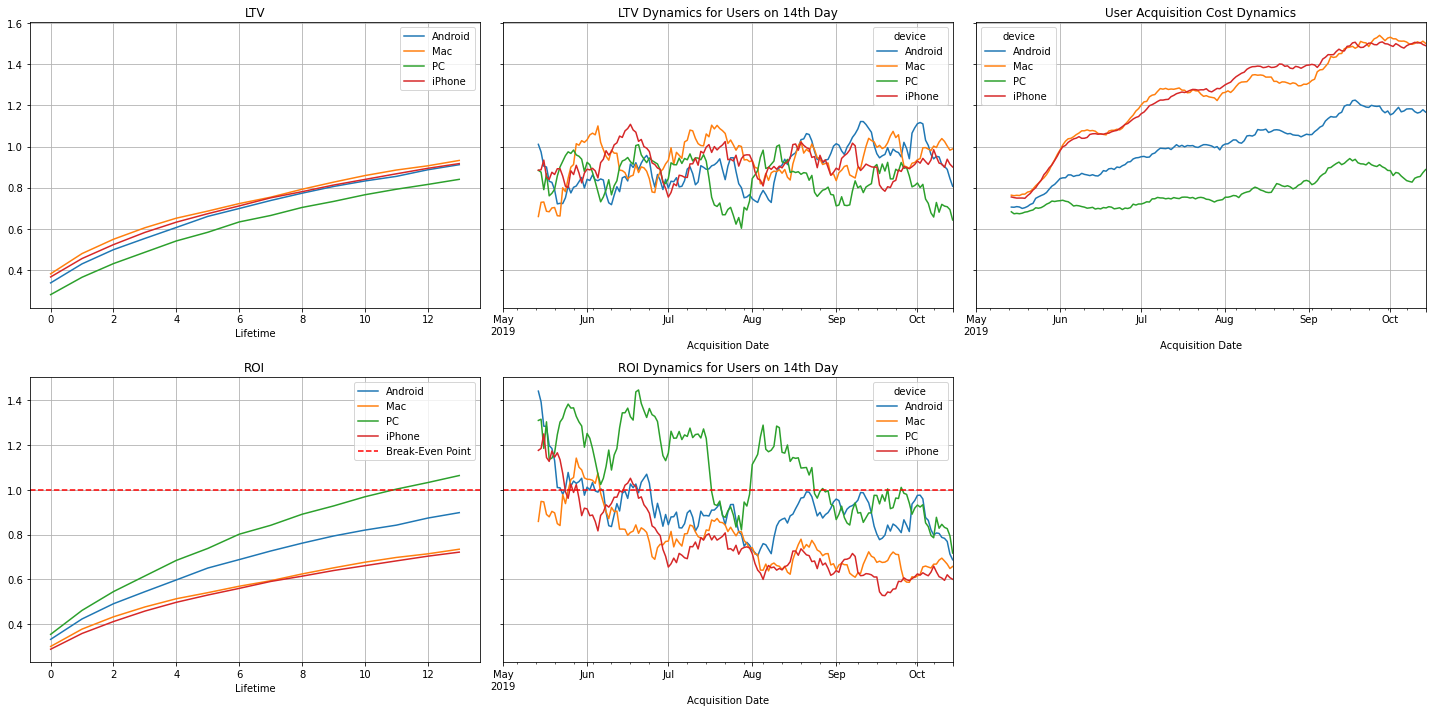

In [42]:
# Preparing LTV and ROI graphs by device breakdown
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channels, orders_channels, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<b> Conclusions on ROI by devices:</b> </br>

- It appears that an excessive amount of advertising budget is spent on iPhone and Mac users and they do not reach profitability despite significant acquisition costs. It is also possible that there are some limitations on Apple platforms that prevent users from reaching profitability. Additionally, Android users only reach 90% ROI on the 14th day.
- Overall, there is a decrease in ROI across all devices since the beginning of the surge in advertising expenses.

### 4.5 Marketing profitability by countries <a class="anchor" id="section4_5"></a>

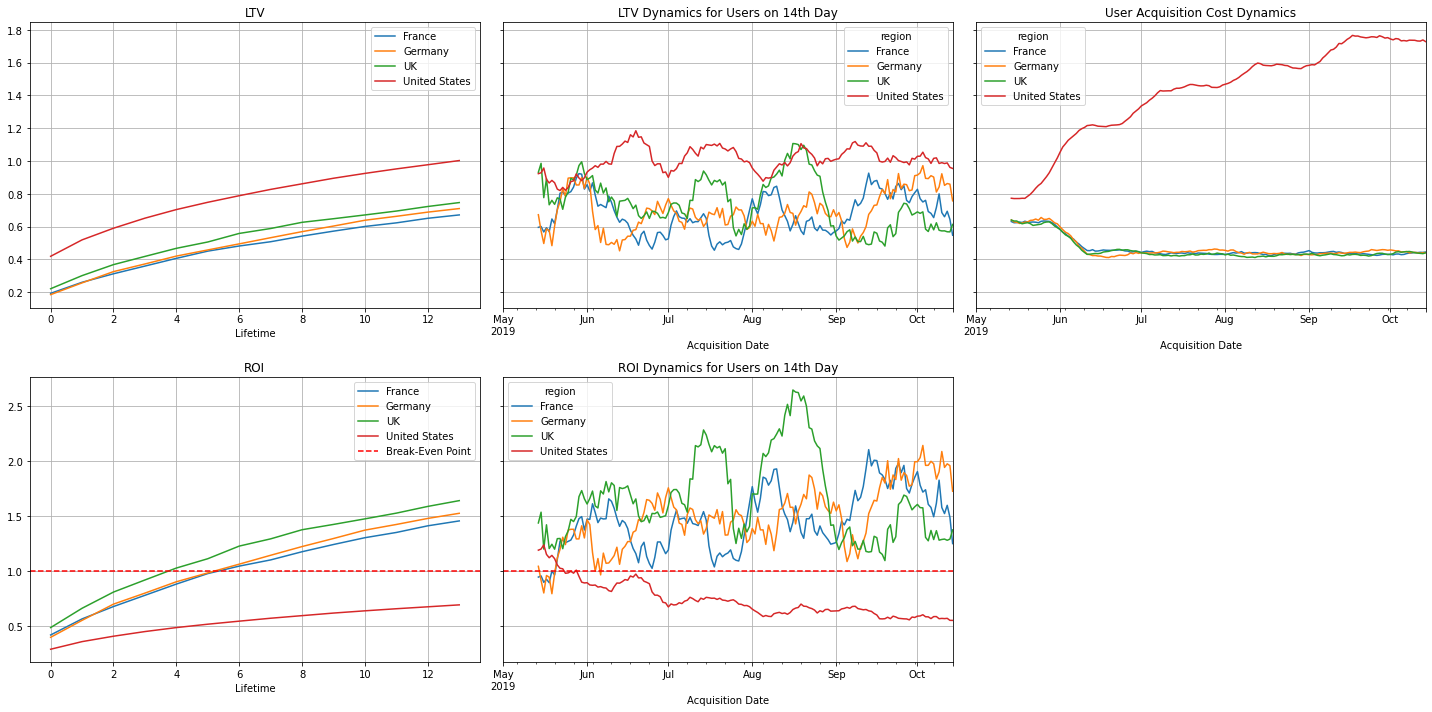

In [43]:
# Preparing LTV and ROI graphs by countries
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channels, orders_channels, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<b> Conclusions on profitability by country: </b> </br>

- The United States significantly stands out in terms of economy among users from other countries. It seems that advertising costs did not bring the expected effect, and users simply became more expensive and do not reach profitability.
- Users from other countries have a positive economy.

### 4.6 Marketing profitability by channels <a class="anchor" id="section4_6"></a>

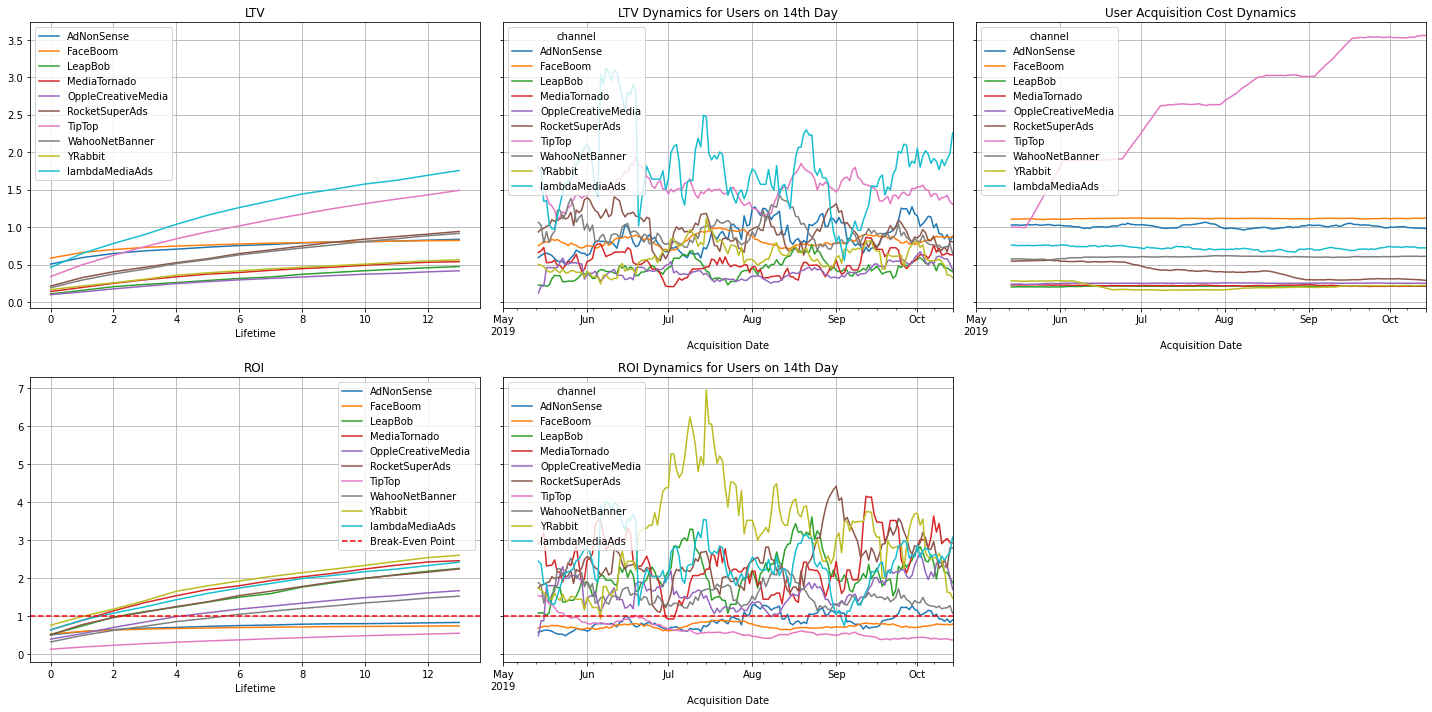

In [44]:
# Preparing LTV and ROI graphs by channels
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_channels, orders_channels, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<b> Conclusions on profitability by channels: </b> </br>

- Users from **AdNonSense**, **FaceBoom**, and **TipTop** channels do not achieve ROI.
- In general, the cost of user acquisition is at the same level across all channels, but with **TipTop**, the expenses grew too quickly.

# 5. Results <a class="anchor" id="chapter5"></a>

### Overall discussion:

**Does advertising aimed at attracting users pay off in general?**

- No, both with and without considering organic users.

**What devices, countries, and advertising channels may have a negative impact on advertising profitability?**

- iPhone, Android, and Mac devices, the USA, and AdNonSense, FaceBoom, and TipTop channels. It is necessary to look at the intersection of users of the mentioned devices, countries, and channels. Perhaps users in the USA show negative dynamics because these channels are most commonly used there and drag down the entire region in terms of profitability.

**What could be causing profitability issues?**

- Users of the main channels are very poorly retained.

### Conclusion:
It is necessary to reconsider the advertising budget by discontinuing the use of **AdNonSense**, **FaceBoom**, and **TipTop**, or identifying the reasons for the low retention of users who came through these channels. **FaceBoom** has the highest conversion rate among the channels but the worst retention. It is necessary to consider options for improving user retention with the potential to turn the economics of this channel into positive profitability.

The reasons for negative economics can be both technical (users encounter some problems when transitioning from these channels) and in terms of the specific offers presented after the transition.

Attention should be paid to **YRabbit** and **MediaTornado** channels. Both channels have positive user economics in terms of ROI and are generally better in terms of retention compared to other channels, but it is necessary to assess the possibilities for improving conversion rates in these channels.

**lambdaMediaAds** appears to be a very promising channel with high ROI, average retention, and high conversion rates at the level of expensive channels.